# Movie Recommendation System

This project is designated to:

First, explore the `corrwith` method within `Pandas` to calculate the correlation between a particular movie rating and all other movie ratings of all users.

Then, further explore the `corrwith` method with specific scoring method which calculates all correlations between every movie pairs. Proceed with removing the correlation that were based on a small amount of behavior information. Finally input a set of movie ratings by a test user, then review the top 10 recommended movies.

Moreover, we will try 2 different methods to improve the system:
1) Implement penalization to poorly rated movies and its recommendations.
2) Examine the data and remove outliers.

Lastly, we will test the system with train/test.

## Part 1: Building an Item-Based Collaborative Filtering Recommendation List for Movie Star Wars

We will start by loading up the MovieLens dataset.
Note that we merge the two dataset so we could work with movie titles instead of ID's. However, in a production setting, the general practice is to work with movie IDs, and change to movie title at the display layer for efficiency purpose.

In [3]:
import pandas as pd

rating_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names = rating_cols, usecols=range(3), encoding="ISO-8859-1")

movie_cols = ['movie_id', 'title']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=movie_cols, usecols=range(2), encoding="ISO-8859-1")

ratings = pd.merge(movies, ratings)

In [4]:
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


We will now use the `pivot_table` function on a DataFrame to construct a clear user / movie rating matrix. 
Note: NaN indicates missing data, in this case movies that specific user didn't rate.

In [11]:
movieRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
movieRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We could extract a Series of users who rated Star Wars:

In [12]:
starWarsRatings = movieRatings['Star Wars (1977)']
starWarsRatings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Pandas' `corrwith` function makes it really easy to compute the pairwise correlation of Star Wars' vector of user rating with every other movie.

In [13]:
similarMovies = movieRatings.corrwith(starWarsRatings)
similarMovies = similarMovies.dropna()
df = pd.DataFrame(similarMovies)
df.head(10)

/Users/zzzh/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/zzzh/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,0
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


We can now further inspect the movies that have high correlation with the `Star Wars (1977)`.

In [14]:
similarMovies.sort_values(ascending=False)

title
Hollow Reed (1996)            1.0
Commandments (1997)           1.0
Cosi (1996)                   1.0
No Escape (1994)              1.0
Stripes (1981)                1.0
                             ... 
For Ever Mozart (1996)       -1.0
Frankie Starlight (1995)     -1.0
I Like It Like That (1994)   -1.0
American Dream (1990)        -1.0
Theodore Rex (1995)          -1.0
Length: 1410, dtype: float64

We are seeing some movies that are totally unrelated to `Star Wars (1977)` but have a `1` correlation. This is because we are not considering the fact that there might be a few people who rated Star Wars also rated these movies. To get rid of movies that were only watched by a few people that are producing spurious results, we need to construct a new DataFrame that counts up how many ratings exist for each movie, and also the average rating. 

In [15]:
import numpy as np

movieStats = ratings.groupby('title').agg({'rating': [np.size, np.mean]})
movieStats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

We want to eliminate movies that were rated by less than 100 people.

In [16]:
popularMovies = movieStats['rating']['size'] >= 100
movieStats[popularMovies].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          584  4.359589
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

We can then join with our original set of similar movies to Star Wars:

In [17]:
#df = movieStats[popularMovies].join(pd.DataFrame(similarMovies, columns=['similarity']))

# Updated for newer Pandas releases that don't allow merging between different levels; we must flatten it first now.
mappedColumnsMoviestat=movieStats[popularMovies]
mappedColumnsMoviestat.columns=[f'{i}|{j}' if j != '' else f'{i}' for i,j in mappedColumnsMoviestat.columns]
df = mappedColumnsMoviestat.join(pd.DataFrame(similarMovies, columns=['similarity']))

In [18]:
df.head()

,rating|size,rating|mean,similarity
title,,,
101 Dalmatians (1996),109,2.908257,0.211132
12 Angry Men (1957),125,4.344000,0.184289
2001: A Space Odyssey (1968),259,3.969112,0.230884
Absolute Power (1997),127,3.370079,0.085440
"Abyss, The (1989)",151,3.589404,0.203709


In [19]:
df.sort_values(['similarity'], ascending=False)[:15]

,rating|size,rating|mean,similarity
title,,,
Star Wars (1977),584,4.359589,1.000000
"Empire Strikes Back, The (1980)",368,4.206522,0.748353
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
Austin Powers: International Man of Mystery (1997),130,3.246154,0.377433
"Sting, The (1973)",241,4.058091,0.367538
Indiana Jones and the Last Crusade (1989),331,3.930514,0.350107
Pinocchio (1940),101,3.673267,0.347868
"Frighteners, The (1996)",115,3.234783,0.332729


The result is a list of movies that are most similar to "Star Wars" in terms of user ratings, among those movies that have a significant number of ratings (at least 100). This is a form of item-based collaborative filtering because it's making recommendations based on the similarity of items (movies) as opposed to user-based collaborative filtering, which makes recommendations based on the similarity of users.

The process is item-based because the similarity calculation is done between items (movies), not between user profiles. It's collaborative because it uses the collective ratings of the user community to determine similarities.

This approach is particularly useful for finding movies that share audience rating patterns with "Star Wars", which can be recommended to someone who liked "Star Wars". It assumes that movies with similar rating patterns will appeal to similar audiences.

## Part 2: Building an Item-Based Collaborative Filtering Recommendation System

We will be using the same set of data from part 1.

In [20]:
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [23]:
userRatings = movieRatings
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will utilize the pandas' built-in corr() method that will compute a correlation score for every column pair in the matrix.

In [ ]:
corrMatrix = userRatings.corr()
corrMatrix.head()

Similar to part 1, we want to get rid of relationships that were based on a small amount (< 100) of behavior information.

In [25]:
# use the pearson correlation method and only consider the scores that
# were backed up by 100 people that rated both movies
corrMatrix = userRatings.corr(method='pearson', min_periods=100)
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's produce some movie recommendations for user ID 0, who I manually added to the data set as a test case. This guy really likes Star Wars and The Empire Strikes Back, but hated Gone with the Wind. I'll extract his ratings from the userRatings DataFrame, and use dropna() to get rid of missing data (leaving me only with a Series of the movies I actually rated)

In [33]:
myRatings = userRatings.loc[0].dropna()
myRatings

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

In [35]:
simCandidates = pd.Series()
for i in range(0, len(myRatings.index)):
    print ("Adding sims for " + myRatings.index[i] + "...")
    # Retrieve similar movies to this one that I rated
    sims = corrMatrix[myRatings.index[i]].dropna()
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: x * myRatings[i])
    # Add the score to the list of similarity candidates
    simCandidates = pd.concat([simCandidates, sims])
    
#Glance at our results so far:
print ("sorting...")
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head(10))

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Empire Strikes Back, The (1980)                       5.000000
Star Wars (1977)                                      5.000000
Empire Strikes Back, The (1980)                       3.741763
Star Wars (1977)                                      3.741763
Return of the Jedi (1983)                             3.606146
Return of the Jedi (1983)                             3.362779
Raiders of the Lost Ark (1981)                        2.693297
Raiders of the Lost Ark (1981)                        2.680586
Austin Powers: International Man of Mystery (1997)    1.887164
Sting, The (1973)                                     1.837692
dtype: float64


This is starting to look like something useful! Note that some of the same movies came up more than once, because they were similar to more than one movie I rated. We'll use groupby() to add together the scores from movies that show up more than once, so they'll count more:

In [38]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCnadidates = simCandidates.sort_values(inplace=True, ascending=False)
print (simCandidates.head(10))

Empire Strikes Back, The (1980)              8.877450
Star Wars (1977)                             8.870971
Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
dtype: float64


Now we need to eliminate the movies that user has already rated, as recommending a movie that the user has already watched isn't useful.

In [49]:
filteredSims = simCandidates.drop(myRatings.index)

print('Given your ratings on the following movies:')
for movie, rating in myRatings.items():
    print(f"{movie}: {rating}")

print('\nHere are the top 10 recommended movies for you:')
print(filteredSims.head(10))

Given your ratings on the following movies:
Empire Strikes Back, The (1980): 5.0
Gone with the Wind (1939): 1.0
Star Wars (1977): 5.0

Here are the top 10 recommended movies for you:
Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
Wizard of Oz, The (1939)                     3.200268
Dumbo (1941)                                 2.981645
dtype: float64


This process is an example of item-based collaborative filtering. It's 'item-based' because the recommendation is based on the similarity between items (movies) rather than between user profiles. It's 'collaborative' because it uses the ratings of the user community to find similarities between movies.

In summary, this result is a personalized recommendation list of movies for a particular user, generated by an item-based collaborative filtering system.

## Part 3: Further develop the system with extra maneuvers

### Part 3.1: Penalizing poorly rated movies

Also, it looks like some movies similar to Gone with the Wind - which I hated - made it through to the final list of recommendations. Perhaps movies similar to ones the user rated poorly should actually be penalized, instead of just scaled down?

In [50]:
def custom_scale(rating, correlation):
    if rating >= 3:
        return correlation * rating
    elif rating == 2:
        return correlation * (rating / 2)
    else:  # rating is 1
        return correlation * (rating / 4)

# Example of applying the custom scaling
sims = sims.map(lambda x: custom_scale(myRatings[i], x))


In [53]:
simCandidates = pd.Series()
for i in range(0, len(myRatings.index)):
    print ("Adding sims for " + myRatings.index[i] + "...")    
    # Retrieve similar movies to this one that I rated
    sims = corrMatrix[myRatings.index[i]].dropna()
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: custom_scale(myRatings[i], x))
    # Add the score to the list of similarity candidates
    simCandidates = pd.concat([simCandidates, sims])

print ("sorting...")
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCnadidates = simCandidates.sort_values(inplace=True, ascending=False)
filteredSims = simCandidates.drop(myRatings.index)
print(filteredSims.head(10))

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Return of the Jedi (1983)                    7.021237
Raiders of the Lost Ark (1981)               5.410337
Bridge on the River Kwai, The (1957)         3.366616
Indiana Jones and the Last Crusade (1989)    3.359545
Cinderella (1950)                            3.245412
Sting, The (1973)                            3.239681
Back to the Future (1985)                    3.164952
Field of Dreams (1989)                       3.106959
Dumbo (1941)                                 2.981645
Star Trek: The Wrath of Khan (1982)          2.968080
dtype: float64


### Part 3.2: Removing outliers

There are also probably some outliers in the user rating data set - some users may have rated a huge amount of movies and have a disporportionate effect on the results. See if removing them improves things.

An approach here is to calculate the average number of ratings per user, then users that rates movies beyond two standard deviations of the median value in the dataset are rejected.

In [55]:
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [58]:
num_ratings = ratings.groupby('user_id').size().reset_index(name='number_of_ratings')
num_ratings.head()

,user_id,number_of_ratings
0,0,3
1,1,272
2,2,62
3,3,54
4,4,24


In [62]:
mean = num_ratings['number_of_ratings'].mean()

In [63]:
median = num_ratings['number_of_ratings'].median()

In [64]:
std = num_ratings['number_of_ratings'].std()

In [65]:
print(mean, median, std)

105.93538135593221 64.5 100.93394760785854


Seems filtering out anything beyond two standard deviations of the median value in the dataset is not viable. To better understand the nature of the data, we need to plot the number of ratings in a histogram.

<Axes: xlabel='number_of_ratings', ylabel='Count'>

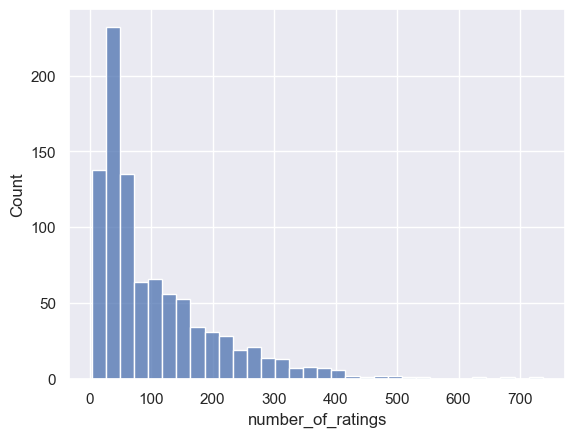

In [68]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.histplot(num_ratings['number_of_ratings'])

From this graph we can observe that histogram of `number of ratings` is skew to the right, while the majority of ratings resides between 0 to 100, a steady trend around 100-200 with an average around 50 users. Therefore we can stick with the idea of removing data that are two standard deviations away from the median.

Number of Users before filtering: 944
Number of Users after filtering: 862
Maximum number of ratings before filtering: 737
Maximum number of ratings after filter: 263


<Axes: xlabel='number_of_ratings', ylabel='Count'>

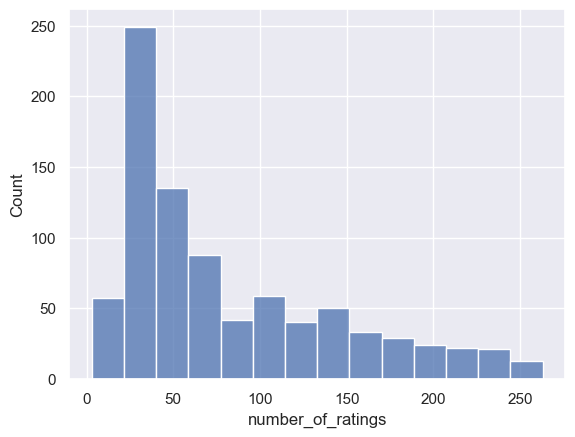

In [79]:
upper_bound = median + (2 * std)
filtered_num_ratings = num_ratings[num_ratings['number_of_ratings'] < upper_bound]
print(f"Number of Users before filtering: {num_ratings.shape[0]}")
print(f"Number of Users after filtering: {filtered_num_ratings.shape[0]}")
print(f"Maximum number of ratings before filtering: {num_ratings['number_of_ratings'].max()}")
print(f"Maximum number of ratings after filter: {filtered_num_ratings['number_of_ratings'].max()}")
sns.histplot(filtered_num_ratings['number_of_ratings'])

The above we could see the result after removing `outliers`. Now let's reproduce the user recommendation.

In [84]:
filtered_ratings = ratings[ratings['user_id'].isin(filtered_num_ratings['user_id'])]
print(ratings.shape[0])
print(filtered_ratings.shape[0])

100003
71119


In [85]:
movieRatings = filtered_ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
movieRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0


In [86]:
corrMatrix = movieRatings.corr(method='pearson', min_periods=100)
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
simCandidates = pd.Series()
for i in range(0, len(myRatings.index)):
    print ("Adding sims for " + myRatings.index[i] + "...")    
    # Retrieve similar movies to this one that I rated
    sims = corrMatrix[myRatings.index[i]].dropna()
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: custom_scale(myRatings[i], x))
    # Add the score to the list of similarity candidates
    simCandidates = pd.concat([simCandidates, sims])

print ("sorting...")
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCnadidates = simCandidates.sort_values(inplace=True, ascending=False)
filteredSims = simCandidates.drop(myRatings.index)
print(filteredSims.head(10))

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Return of the Jedi (1983)                     6.886778
Raiders of the Lost Ark (1981)                5.246584
Star Trek III: The Search for Spock (1984)    4.057361
Sting, The (1973)                             3.614919
Star Trek: The Wrath of Khan (1982)           3.558104
Wizard of Oz, The (1939)                      3.466549
Lion King, The (1994)                         3.295743
Men in Black (1997)                           3.257072
Indiana Jones and the Last Crusade (1989)     3.044207
Aladdin (1992)                                3.006441
dtype: float64


We can see that movies such as `Cinderella` is not longer in the list, this looks better than our previous results intuitively. However, without actually taking a look inside the data itself, and see how the values of correlation chagnes with the removal of outliers, we cannot conclude that this result is indeed better, but it makes more sense for now.

### Part 3.3: train/test

We're evaluating the result qualitatively here, but we could actually apply train/test and measure our ability to predict user ratings for movies they've already watched. Whether that's actually a measure of a "good" recommendation is debatable, though!

I have decided to find a user whose number of ratings is closest to the median.

In [90]:
num_ratings = filtered_ratings.groupby('user_id').size().reset_index(name='number_of_ratings')
num_ratings.head()

,user_id,number_of_ratings
0,0,3
1,2,62
2,3,54
3,4,24
4,5,175


In [93]:
median_ratings = num_ratings['number_of_ratings'].median() # 57.5

# Find the difference between each user's number_of_ratings and the median, and take the absolute value
num_ratings['difference'] = num_ratings['number_of_ratings'].sub(median_ratings).abs()

# Find the user_id with the smallest difference
closest_user = num_ratings.loc[num_ratings['difference'].idxmin(), 'user_id']

closest_user

     user_id  number_of_ratings  difference
0          0                  3        54.5
1          2                 62         4.5
2          3                 54         3.5
3          4                 24        33.5
4          5                175       117.5
..       ...                ...         ...
857      939                 49         8.5
858      940                107        49.5
859      941                 22        35.5
860      942                 79        21.5
861      943                168       110.5

[862 rows x 3 columns]


37

In [98]:
# closestUserRatings = movieRatings['user_id' == closest_user].dropna()
closestUserRatings = movieRatings.loc[closest_user].dropna()
closestUserRatings

title
Alien (1979)                                 4.0
Alien 3 (1992)                               3.0
Aliens (1986)                                4.0
Arrival, The (1996)                          2.0
Bad Boys (1995)                              4.0
Batman (1989)                                5.0
Batman Returns (1992)                        2.0
Blade Runner (1982)                          4.0
Booty Call (1997)                            4.0
Braveheart (1995)                            5.0
Broken Arrow (1996)                          3.0
Bulletproof (1996)                           4.0
Chain Reaction (1996)                        3.0
Clear and Present Danger (1994)              4.0
Crow, The (1994)                             5.0
Daylight (1996)                              3.0
Demolition Man (1993)                        3.0
Die Hard 2 (1990)                            5.0
Die Hard: With a Vengeance (1995)            4.0
Dragonheart (1996)                           2.0
Empire Strikes

Split the ratings of this user to train and test set.

In [102]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(closestUserRatings, test_size=0.2, random_state=0)

In [104]:
simCandidates = pd.Series()
for i in range(0, len(train.index)):
#     print ("Adding sims for " + train.index[i] + "...")    
    # Retrieve similar movies to this one that I rated
    sims = corrMatrix[train.index[i]].dropna()
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: custom_scale(train[i], x))
    # Add the score to the list of similarity candidates
    simCandidates = pd.concat([simCandidates, sims])

print ("sorting...")
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCnadidates = simCandidates.sort_values(inplace=True, ascending=False)
filteredSims = simCandidates.drop(myRatings.index)
print(filteredSims.head(10))

sorting...
Raiders of the Lost Ark (1981)               30.420349
Independence Day (ID4) (1996)                30.032144
Fugitive, The (1993)                         29.791150
Back to the Future (1985)                    28.527844
Terminator 2: Judgment Day (1991)            27.581878
Indiana Jones and the Last Crusade (1989)    26.192601
Terminator, The (1984)                       24.922574
Rock, The (1996)                             23.871835
Return of the Jedi (1983)                    23.618920
Star Trek: First Contact (1996)              21.756808
dtype: float64


In [105]:
test

title
Professional, The (1994)      3.0
Money Train (1995)            2.0
Seven (Se7en) (1995)          4.0
Heat (1995)                   3.0
Bulletproof (1996)            4.0
Aliens (1986)                 4.0
Mission: Impossible (1996)    4.0
Under Siege (1992)            4.0
Escape from L.A. (1996)       2.0
Twister (1996)                2.0
Bad Boys (1995)               4.0
Broken Arrow (1996)           3.0
Name: 37, dtype: float64

In [121]:
counter = 0
for title, score in filteredSims.items():
    if title in test.keys():
        print(title, score, test[title])
        counter+=1
        
print(f"{counter} out of {len(test.keys())} movies were recommended.")

Mission: Impossible (1996) 16.270859298811263 4.0
Aliens (1986) 15.120760707958153 4.0
Twister (1996) 10.568325056258084 2.0
Broken Arrow (1996) 9.897549540251951 3.0
Seven (Se7en) (1995) 8.429490775680003 4.0
Heat (1995) 3.389382288862904 3.0
6 out of 12 movies were recommended.


As we can see, 6 out of 12 movies from the test set were recommended, this is not too good considering a 50% accuracy, but it is still on the right path.

We can see out of 6 movies recommended, 3 of them were rated 4-stars originally, and 2 of them were rated 3-stars, this is desired according to our algorithm on scoring.

Two things could be further improve here:
1. Create a better normalization and scoring system to better illustrate the relationship between score and rating. Currently score is not out of 5 which is hard to compare with the test set.
2. Find a way to better recommend movies, the aim is to at least recommend most of the >= 3-stars rated movies from the test set, and it is okay to not recommend movies < 3-stars from the test set. This is due to the nature of our scoring system, where 1 and 2-stars ratings would penalize the corresponding related movies.